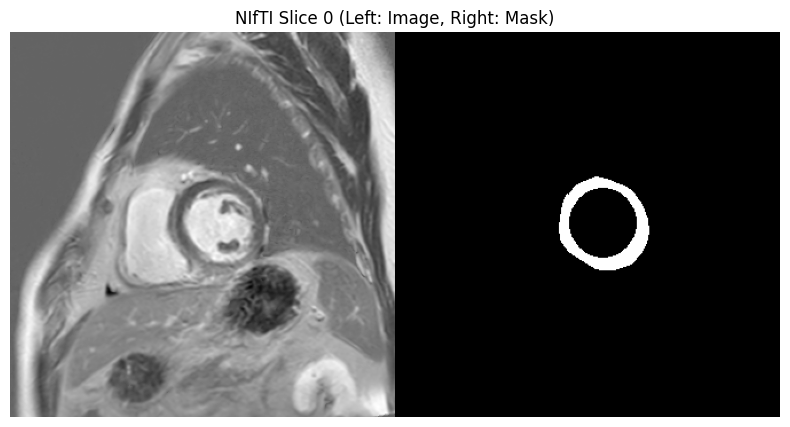

In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def display_and_save_nifti_with_mask(nifti_file_path, mask_file_path, output_png_path, slice_index=None):
    """
    并排显示和保存NIfTI图像及其Mask。
    
    参数:
        nifti_file_path (str): NIfTI图像文件的路径。
        mask_file_path (str): Mask文件的路径。
        output_png_path (str): 输出的PNG文件路径。
        slice_index (int, 可选): 指定要显示的切片索引。如果为None，则使用中间切片。
    """
    # 加载NIfTI图像和Mask
    nifti_image = nib.load(nifti_file_path)
    mask_image = nib.load(mask_file_path)
    
    # 获取图像数据
    nifti_data = nifti_image.get_fdata()
    mask_data = mask_image.get_fdata()
    
    # 如果未指定切片索引，则使用中间切片
    if slice_index is None:
        slice_index = nifti_data.shape[2] // 2  # 假设第三维度是切片维度
    
    # 提取指定切片
    nifti_slice = nifti_data[:, :, slice_index]
    mask_slice = mask_data[:, :, slice_index]
    
    # 归一化NIfTI图像切片到0-255范围
    nifti_slice = ((nifti_slice - np.min(nifti_slice)) / (np.max(nifti_slice) - np.min(nifti_slice)) * 255).astype(np.uint8)
    
    # 将Mask切片转换为二值图像（0或255）
    mask_slice = (mask_slice > 0) * 255
    mask_slice = mask_slice.astype(np.uint8)
    
    # 创建一个并排显示的图像
    combined_image = np.hstack((nifti_slice, mask_slice))
    
    # 保存并排显示的图像为PNG文件
    combined_pil_image = Image.fromarray(combined_image)
    combined_pil_image.save(output_png_path)
    
    # 可视化并排显示的图像
    plt.figure(figsize=(10, 5))
    plt.imshow(combined_image, cmap='gray')
    plt.title(f"NIfTI Slice {slice_index} (Left: Image, Right: Mask)")
    plt.axis('off')  # 不显示坐标轴
    plt.show()
nifti_file_path = "nnUNet_raw/Dataset100_RenjiPSIR/imagesTr/case_0021_0000.nii.gz"
mask_file_path = nifti_file_path.replace('imagesTr','labelsTr').replace('_0000.nii.gz','.nii.gz')
output_png_path = "slice.png"
display_and_save_nifti_with_mask(nifti_file_path,mask_file_path,output_png_path)